# CS145: Project 3 | Stackoverflow_analysis

Collaborators:

* Sijin Wang neversjw
* Yu Liu yul231

# Project Overview

---


We are going to explore the dataset: stackoverflow. We are trying to explore features that determine a popular post question and validate our feature analysis by conducting machine learning.

We assume the best answer is the answer with the most votes. The label we chose is log scale (base=2) of the view_count, because we noticed most of the view_count is updated as multiples of 2. We split the training set, evluation set, and test set based on year (training: before 2019, evaluation: 2019, test: 2020).

**Label:**      View_count in log scale

**Features:**
1. Number of  answers for each question (A popular question can attract more people to answer)
2. last_acitivity_date, specifically year (People are prone to read newly posted questions)
3. Sum of scores for the question and its best answer (Score is the reflection of the quality for both answers and questions, but there might be a question with many poor answers, so we only choose the score of the best answer)
4. Sum of comment count for the question and its best answer (Popular questions and answers can attract lots of comments, but it might because statements are unclear. We have other features to eliminate the possibility of the poor question, but for answers, we only choose the best one)
5. Sum of votes for the question and its best answer (The number of votes can reflect the quality/popularity of the post)
6. The favorite_count for the question (The more people favor the post means the more popular it is)
7. The total reputation of the user who asks the question and the user has the max reputation


For the improvement, we exclude the questions post without answers and add more features:
8. The length of the best answer(Longer answer can deliver more information/keywords, which improves the popularity of the question) Here, we also visualize the feature_8_improve, in which we exclude the questions without answers

9. Sum of post_links for the questions (A popular post is generally informative, which is highly possible to have more post_links)

10. Sum of related_post_links for the questions and all of the answers. A popular question or answer is more likely to be referred by another post.

11. The total number of tags per question. A question with more tags is more likely and searched and viewed. Here, we also explore the effect of tagNum on average_view_count and std_view_count to further validate our assumption.

12. Average and standard deviation of tag count for each question. The tag count for a question reflects the occurrence of that tag in the dataset. Therefore, it could be used as the standard for measuring the popularity of the tag. A question is more popular with more "popular" tags.  
It's possible that a question has the most "popular" tag while many less "popular tags". In this case, we still think this question is a popular question, but these less "popular" tags will affect the avg_tag_count. 

13. The classes of tags for each question. Here, we categorize all the tags as 6 classes: web development, database tech, big data, data science, programming languages, and other. We choose top 5 tags for each category according to the number of repos containing at least one file in that language (project 2) and common senses.

  1. Web Development: AngularJs, PHP, HTML, JavaScript, CSS
  2. DataBase Tech: MySQL, MongoDB, NoSQL, PostgreSQL, Cassandra
  3. Big Data: Hadoop, Hive, Spark, HBase, Kafka
  4. Data Science: Pandas, Matplotlib, Regression, SupportVectorMachines (SVM), Kaggle
  5. Programming Languages: C++, Ruby, Java, C#, Python
  6. Other

**Set:**

We choose all the tuples based on year the year of last activity date.

   1.Training set: Year < 2019

   2.Evluation set: Year = 2019 

   3.Test set: Year = 2020

---


# Analysis of Dataset

---
The dataset, stackoverflow, include 15 tables, with a total size of 253GB. We plan to use 9 of them, with a total size of 110GB. The tables we are going to use are badges, comments, post_links, posts_answers, posts_questions, stackoverflow_posts, tags, users, and votes. 

(Note: We only explain the feature in each table which is related to our analysis)

1. Table 'badges' captures the type of badges for each user (3 types: gold, silver, bronze)
Private key: Id
Foreign key: UserId

2. Table 'comments' captures the text, correponding post id, score of each comment, and corresponding user id. 
Private key: Id
Foreign key: PostId (with posts); UserId (with users)

3. Table 'post_links' captures the text, post id of the source post, post id of the related/target post, and linktypeid (whether the source post contains a link to related postid or postid is a duplicate of the related postid). 
Private key: Id
Foreign key: PostId (with posts)

4. Table 'posts_answers' captures the body of the answer, the number of comments for each answer(comment_count), the question of the answer (parent_id), the score of the answer
Private key: id
Foreign key: parent_id (with posts_questions)

5. Table 'posts_questions' captures the body of the question, the number of answers (answer_count), the number of comments for each question(comment_count), the last acitivity year (lat_acitivity_date), the id of the person who posts this question(own_user_id), the string of tags related to this question e.g. java|maven|python (tags), the score of the question(score), and the number of views (view_count, the feature we use to quantify the popularity).
Private key: id
Foreign key: tags (with tags); owner_user_id (with users) 

6. Table 'stackoverflow_posts' includes all the posts, like answers, questions, tag_wiki, tag_privilage, etc., but here we only consider questions and answers. It's not a combination of all other post tables, since some features are missing and some features are added. It captures the body of the post, the score of the post(score), the userid of the owner (owner_user_id), last_acitivity_date, favorite_count, tags, view_count, and the type of the post: answer or question(post_type_id).
Private key: id
Foreign key: tags (with tags); owner_user_id (with users), tags(with posts_questions)


7. Table 'tags' captures the name of the tag (tag_name), the occurence number of each tag (count).
Private key: id
Foreign key: tag_name (with posts_questions and stackoverflow_posts)

8. Table 'users' captures the reputation of the user (reputation), viewers' opinions on the user (up_votes, down_votes), and the number of views on this user (views).
Private key: id
Foreign key: id (with badges)

9. Table 'votes' captures the corresponding post id (post_id), and the types of votes, e.g. spam, upvote, downvote, offensive, etc. (vote_type_id)
Private key: id
Foreign key: post_id (with stackoverflow_posts, posts_questions, and posts_answers)

----

# Data Exploration & Visualization

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "yuproject1"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
# Add imports for any visualization libraries you may need
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#view_analysis
#feature 1: answer_count for each question
%%bigquery --project $project_id num_answers_view
# We use "AVG" just to speed up the query, and it doesn't affect our visualization since we only want to know the trend.
SELECT AVG(answer_count) as answer_count, view_count 
FROM `bigquery-public-data.stackoverflow.posts_questions` questions
GROUP BY view_count


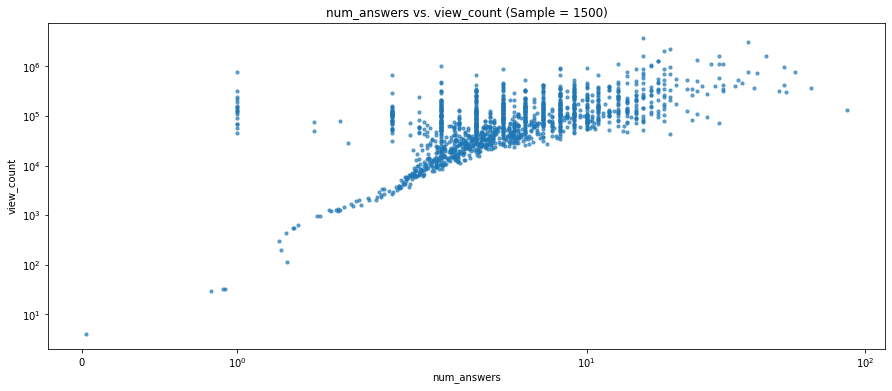

In [ ]:
new = num_answers_view.sample(n=1500, random_state=1)
plt.scatter(new.answer_count, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("num_answers vs. view_count (Sample = 1500)")
plt.xlabel("num_answers")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there's a clear relationship between num_answers and view_count, so we will include this feature in our model.

In [ ]:
#view_analysis
#feature 2: last_activity_date (year) for each question
%%bigquery --project $project_id time_view

SELECT EXTRACT (YEAR FROM last_activity_date) AS year, view_count
FROM `bigquery-public-data.stackoverflow.posts_questions`

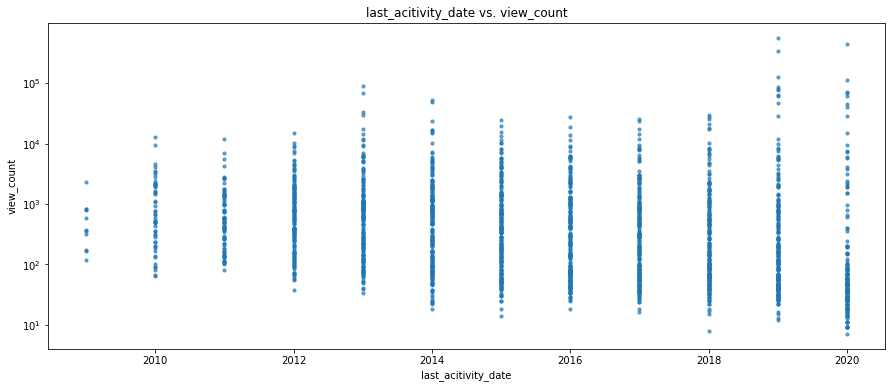

In [ ]:
new = time_view.sample(n=2000, random_state=1)
plt.scatter(new.year, new.view_count,s=10,alpha=0.65)
plt.yscale('symlog')
plt.title("last_acitivity_date vs. view_count (sample = 2000)")
plt.xlabel("last_acitivity_date")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that the number of posts increases with last_acitivity date, but the relationship 
between last_acitivity_date and view_count is not that clear. We will include this feature in our model is because we need to use the year to split the training set, evaluation set, and test set.

In [ ]:
#view_analysis 
#feature 3&4: sum of scores and comment_count for the question and its answer with the most votes (best answer) 

%%bigquery --project $project_id totalScore_Comment
WITH Votes AS 
# get the number of votes for each answer
          (SELECT  count(vote_type_id) as numVotes, post_id 
          FROM `bigquery-public-data.stackoverflow.votes` as vote
          WHERE vote_type_id=2 #vote_type2 is answer
          GROUP BY post_id), 
# get the question with the max numVotes of its best answer
answerMaxVote AS 
                ( SELECT parent_id , max(numVotes) as maxVotes
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers, Votes
                  WHERE answers.id = Votes.post_id
                  GROUP BY parent_id)

SELECT (Qscore + Ascore) as totalScore,  view_count, (ques_comment_count + ans_Comment_count ) as totalCommentCount
FROM (
      # get answerScore, questionScore, answerComment_count, questionScoreview_count in one table
      SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, 
             IF(ques_comment_count is null,0,ques_comment_count) AS ques_comment_count,
             IF(ans_Comment_count is null,0,ans_Comment_count) AS ans_Comment_count,
             questions.view_count
      FROM    
              # get questions with its maxAnsVotes, the question score, view_count, and question_comment_count
              # if there's no maxAnsVotes for that specific question, add 0. (we use left join here)
              (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count, questions.comment_count as ques_comment_count
              FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
              LEFT JOIN answerMaxVote
              ON answerMaxVote.parent_id = questions.id
              Order by maxVotes) as questions        
LEFT JOIN
         # get answers with corresponding questions(parent), maxAnsVotes, and the answer score     
        (SELECT answers.id, answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score, answers.comment_count as ans_Comment_count
        FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
        LEFT JOIN Votes
        ON Votes.post_id = answers.id) as answers          
ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes)


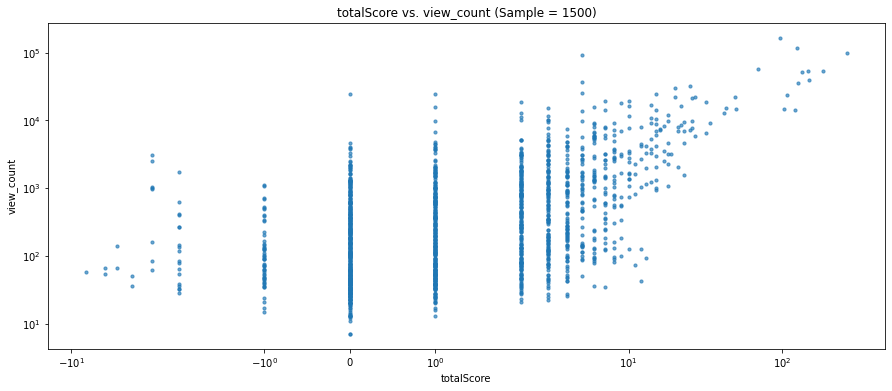

In [ ]:
new = totalScore_Comment.sample(n=1500, random_state=1)
plt.scatter(new.totalScore, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("totalScore vs. view_count (Sample = 1500)")
plt.xlabel("totalScore")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there's an increasing trend between positive totalScore and view_count, so we will include this feature in our model.

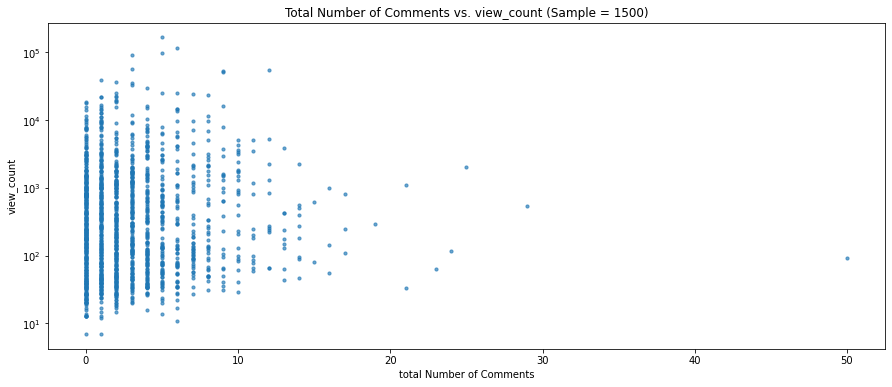

In [ ]:
new = totalScore_Comment.sample(n=1500, random_state=1)
plt.scatter(new.totalCommentCount, new.view_count,s=10,alpha=0.65)
plt.yscale('symlog')
plt.title("Total Number of Comments vs. view_count (Sample = 1500)")
plt.xlabel("total Number of Comments")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there's no relationship between num_comments and view_count, so we will not include this feature in our model.

In [ ]:
#view_analysis
#feature 5: sum of votes for the question and its answer with the most votes 
%%bigquery --project $project_id totalVotes
WITH Votes AS 
# get the number of votes for each answer
          (SELECT  count(vote_type_id) as numVotes, post_id 
          FROM `bigquery-public-data.stackoverflow.votes` as vote
          WHERE vote_type_id=2 #vote_type2 is answer
          GROUP BY post_id),
# get the question with the max numVotes of its best answer
answerMaxVote AS 
                ( SELECT parent_id , max(numVotes) as maxVotes
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers, Votes
                  WHERE answers.id = Votes.post_id
                  GROUP BY parent_id)

SELECT (QuesVotes + IF(maxVotes IS NULL, 0, maxVotes)) as totalVotes, questions.view_count
# get answers with corresponding questions(parent), maxAnsVotes, and the answer score
FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
        LEFT JOIN Votes
        ON questions.ID = Votes.post_id) as questions
LEFT JOIN answerMaxVote
ON answerMaxVote.parent_id = questions.id

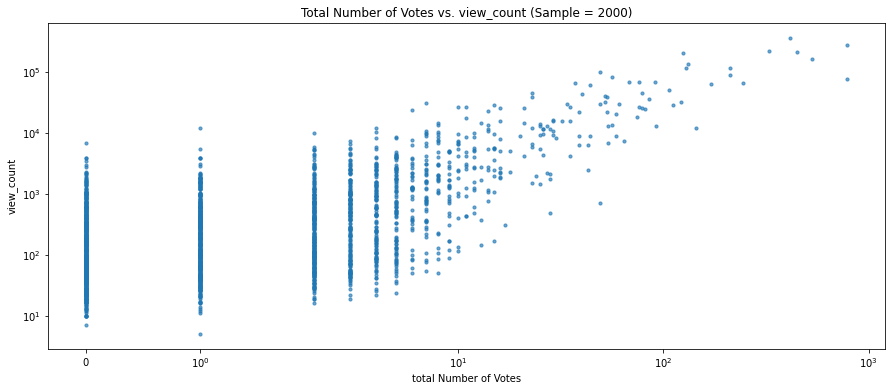

In [ ]:
new = totalVotes.sample(n=2000, random_state=1)
plt.scatter(new.totalVotes, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("Total Number of Votes vs. view_count (Sample = 2000)")
plt.xlabel("total Number of Votes")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there's an increasing trend between total number of votes and view_count, so we will include this feature in our model.

In [ ]:
#view_analysis
#feature 6:  favorite_count for the question 
%%bigquery --project $project_id favorite_count
SELECT  favorite_count as favorCount, view_count
FROM `bigquery-public-data.stackoverflow.posts_questions` 


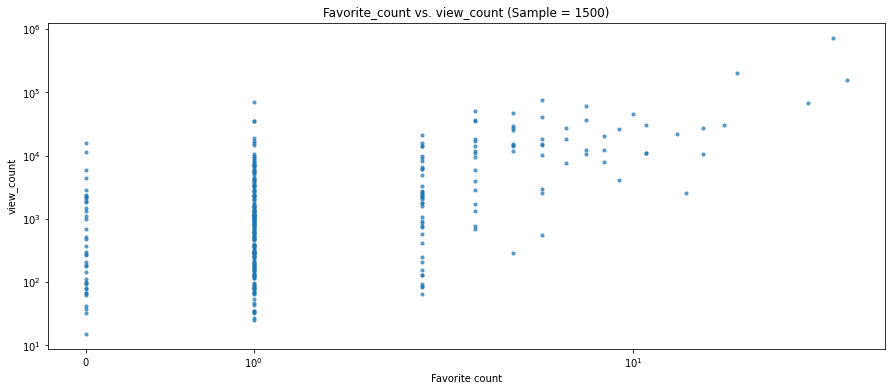

In [ ]:
new = favorite_count.sample(n=1500, random_state=1)
plt.scatter(new.favorCount, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("Favorite_count vs. view_count (Sample = 1500)")
plt.xlabel("Favorite count")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there's a clear relationship between favorite count and view_count, so we will include this feature in our model.

In [ ]:
#view_analysis
#feature 7: the total reputation of the user in a question among the user posted that question and users answered that specific question 
%%bigquery --project $project_id totalReputation
SELECT ans_repu + ques_repu as totalRepu, view_count
FROM( # get the question with questioner reputation and the max reputation of user who have answered this question  
      SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, view_count
      FROM    # get the question with the reputation of the questioner, and question view count
            ( SELECT questions.id as question_id, users.reputation, questions.view_count
            FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                  `bigquery-public-data.stackoverflow.users` as users
            WHERE questions.owner_user_id = users.id) AS questions_users_reputation
      LEFT JOIN    
            # get the question with the max reputation of user who have answered this question   
            ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
            FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                  `bigquery-public-data.stackoverflow.users` as users
            WHERE answers.owner_user_id = users.id
            GROUP BY parent_id) AS answers_users_maxReputation
      ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
)

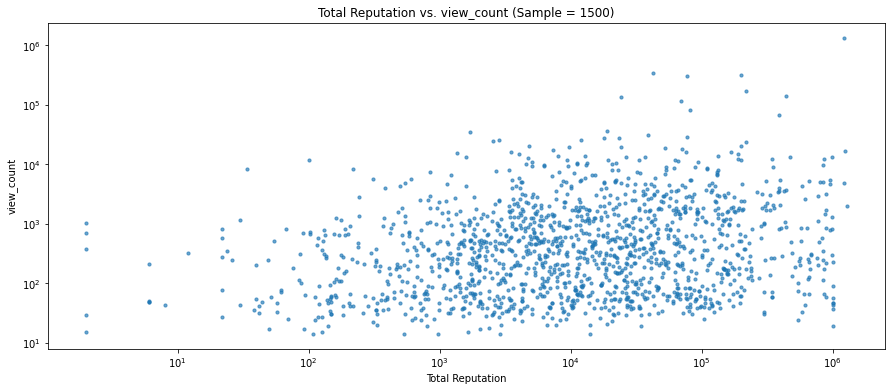

In [ ]:
new = totalReputation.sample(n=1500, random_state=1)
plt.scatter(new.totalReputation, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("Total Reputation vs. view_count (Sample = 1500)")
plt.xlabel("Total Reputation")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there's an increasing trend between total reputation and view_count in the upper bound, so we will include this feature in our model.

# Model creation & evaluation
 



In [ ]:
# create a dataset to store the model
model_dataset_name = 'bqml_stackoverflow'
dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_table(dataset)

In [ ]:
dataset

Dataset(DatasetReference('cs145-290721', 'bqml_stackoverflow'))

For the first trial, we decided to use answer_count, year, favorite_count, totalScore, totalVotes, and totalRepu in the linear regression model and XGB model before the year 2019.

## First trial - linear regression model




In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `bqml_stackoverflow.stackoverflow_model_v1`
OPTIONS(model_type='linear_reg') AS
SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalReputation.totalRepu
       
FROM 
    # feature year, answer_count, and favorite_count
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,
    # if the question doesn't have answer, or its answer don't have votes, then the score of answers 
    # are all 0, thus one question might have more then one totalScore. Hence, we choose max(totalScore)
    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
          LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,


    # if the question doesn't have answer, or its answer don't have votes,
    # thus one question might have more then one totalVotes. Hence, we choose max(totalVotes)
     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
            LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,
    # feature totalRepu
      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id and totalVotes.id =  totalReputation.id and multiFeature.year<2019

""


In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_stackoverflow.stackoverflow_model_v1`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,4.318745,4.359376,None,28566


In [ ]:
%%bigquery --project $project_id

# We use log scale for the label because we notice the view_count is not updated continuously 

SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_stackoverflow.stackoverflow_model_v1`, (
SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalReputation.totalRepu
       

FROM 
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,

    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
          LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,


     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
            LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,

 
      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id and totalVotes.id = totalReputation.id and multiFeature.year=2019
      ))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,1.873805,6.690962,0.063722,1.760499,0.091971,0.119491


## First trial - XGB Tree model


Since the linear regression model couldn't give us a satisfying result. We will try a non-linear method: XGB Tree model to do the machine learning analysis. We wanna see that if using a more complicated model strategy will give us a more satisfying MSE.

In [ ]:
%%bigquery --project $project_id
CREATE OR REPLACE MODEL `bqml_stackoverflow.stackoverflow_model_v2`
OPTIONS(model_type='BOOSTED_TREE_REGRESSOR', 
        BOOSTER_TYPE = 'GBTREE',
         TREE_METHOD = 'HIST',
         EARLY_STOP = TRUE,
         DATA_SPLIT_METHOD = 'AUTO_SPLIT' 
) AS
SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalReputation.totalRepu
       

FROM 
    # feature year, answer_count, and favorite_count
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,
    # if the question doesn't have answer, or its answer don't have votes, then the score of answers 
    # are all 0, thus one question might have more then one totalScore. Hence, we choose max(totalScore)
    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
          LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,

    # if the question doesn't have answer, or its answer don't have votes,
    # thus one question might have more then one totalVotes. Hence, we choose max(totalVotes)
     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
            LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,
      
      # feature totalRepu
      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id   and totalVotes.id  = totalReputation.id and multiFeature.year<2019

In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_stackoverflow.stackoverflow_model_v2`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,10,1.82471,1.84661,0.3,61
1,0,9,1.84166,1.86283,0.3,59
2,0,8,1.87516,1.89485,0.3,57
3,0,7,1.93997,1.95811,0.3,53
4,0,6,2.06401,2.07902,0.3,82
5,0,5,2.29461,2.30567,0.3,57
6,0,4,2.70286,2.70972,0.3,60
7,0,3,3.38460,3.38545,0.3,12743
8,0,2,4.46335,4.45673,0.3,52
9,0,1,6.09714,6.08233,0.3,163614


In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_stackoverflow.stackoverflow_model_v2`, (
SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalReputation.totalRepu
       

FROM 
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,

    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
          LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,


     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
            LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,

      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id and totalVotes.id = totalReputation.id and multiFeature.year=2019
      ))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,1.565449,3.417749,0.051563,1.493461,0.536178,0.582309


After completing the first trial, we found mse changes from 6.69 to 3.42, and r2 changes from 0.09 to 0.536 when we switch from linear regression to XGB. Therefore, we decide to use XGB for further improvment. 

## Improvement
1. Exclude the questions post without answers
2. Add features: total_answer_length, sum_post_links, sum_related_post_links, tag_number, tag_count (avg & std), and tag_class

## Improvement - New features visualization

In [ ]:
#view_analysis
#feature 8: answer_length of the best answer for the question (no matter the question has answer or not)
%%bigquery --project $project_id best_answer_length
WITH Votes AS 
# get the number of votes for each answer
          (SELECT  count(vote_type_id) as numVotes, post_id 
          FROM `bigquery-public-data.stackoverflow.votes` as vote
          WHERE vote_type_id=2 #vote_type2 is answer
          GROUP BY post_id),
# get the question with the max numVotes of its best answer
answerMaxVote AS 
                ( SELECT parent_id , max(numVotes) as maxVotes
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers, Votes
                  WHERE answers.id = Votes.post_id
                  GROUP BY parent_id)

SELECT answer_length,  view_count # get the answer_length for the best answer
FROM  # get the question with its maxVotes, and view_count 
     (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, questions.view_count
     FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
     LEFT JOIN answerMaxVote
     ON answerMaxVote.parent_id = questions.id
     Order by maxVotes) as questions
              
LEFT JOIN # get the question with the length of all its answers answer_length, and correponding numVotes 
     # we use join here to exclude questions without answers 
    (SELECT LENGTH(answers.body) as answer_length,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes
    FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
    LEFT JOIN Votes
    ON Votes.post_id = answers.id) as answers  
ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes

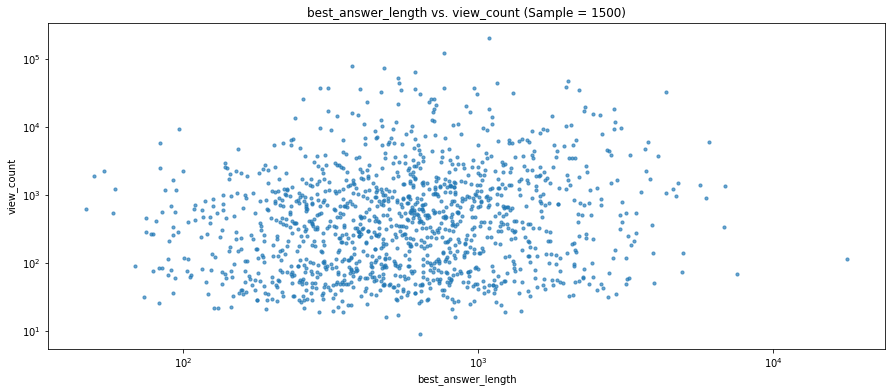

In [ ]:
new = best_answer_length.sample(n=1500, random_state=1)
plt.scatter(new.answer_length, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("best_answer_length vs. view_count (Sample = 1500)")
plt.xlabel("best_answer_length")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

In [ ]:
#view_analysis
#feature 8_improve: total answer_length of the best answer for the question (exclude questions without answers)
%%bigquery --project $project_id best_answer_length_with0

        SELECT IF(answer_length IS NULL, 0 ,answer_length) as answer_length,  view_count
        FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes,questions.view_count
                FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                LEFT JOIN
                        (SELECT parent_id , max(numVotes) as maxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                  (SELECT  count(vote_type_id) as numVotes, post_id
                                    FROM `bigquery-public-data.stackoverflow.votes` as vote
                                    WHERE vote_type_id=2
                                    GROUP BY post_id) AS Votes
                            WHERE answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
                    ON answerMaxVote.parent_id = questions.id
                    Order by maxVotes) as questions
              
      JOIN     # get the question with the length of all its answers answer_length, and correponding numVotes 
               # we use left join here to include questions without answers    
              (SELECT LENGTH(answers.body) as answer_length,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes
              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
              LEFT JOIN
                    (SELECT  count(vote_type_id) as numVotes, post_id
                    FROM `bigquery-public-data.stackoverflow.votes` as vote
                    WHERE vote_type_id=2
                    GROUP BY post_id) AS Votes
              ON Votes.post_id = answers.id) as answers  
     ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes

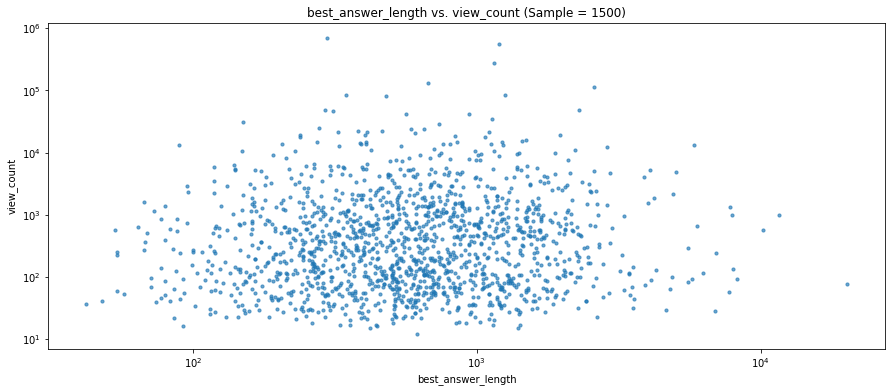

In [ ]:
new = best_answer_length_with0.sample(n=1500, random_state=1)
plt.scatter(new.answer_length, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("best_answer_length vs. view_count (Sample = 1500)")
plt.xlabel("best_answer_length")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that a slightly peak in the middle of the graph, so we will include this feature. In the improved version, the correlation is similar to the previous one.

In [ ]:
#view_analysis
#feature 9: the total number of related_post_links for each question and all of its answers 
#(how many times are the post related by other posts)
%%bigquery --project $project_id post_links_view
SELECT (q_num_links+ans_num_links) as totalLinks, view_count
FROM(
      SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
             IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
             questions.view_count
      FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions
      LEFT JOIN # get the question with the number of question related_post_links, 
                # and the number of all answer related_post_links 
             (SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                     IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                     q_w_links.id AS q_w_links_id
              FROM # get the question with the number of related_post_links
                   (SELECT count(links.id) AS q_num_links, questions.id as id 
                    FROM `bigquery-public-data.stackoverflow.post_links`links,
                         `bigquery-public-data.stackoverflow.posts_questions`questions
                    WHERE links.post_id = questions.id
                    GROUP BY questions.id) as q_w_links
              LEFT JOIN # get the answer with the number of related_post_links
                   (SELECT count(links.id) AS ans_num_links, answers.parent_id
                    FROM `bigquery-public-data.stackoverflow.post_links`links,
                         `bigquery-public-data.stackoverflow.posts_answers`answers
                    WHERE links.post_id = answers.id
                    GROUP BY answers.parent_id) as a_w_links
              ON a_w_links.parent_id = q_w_links.id )
      ON  questions.id = q_w_links_id )


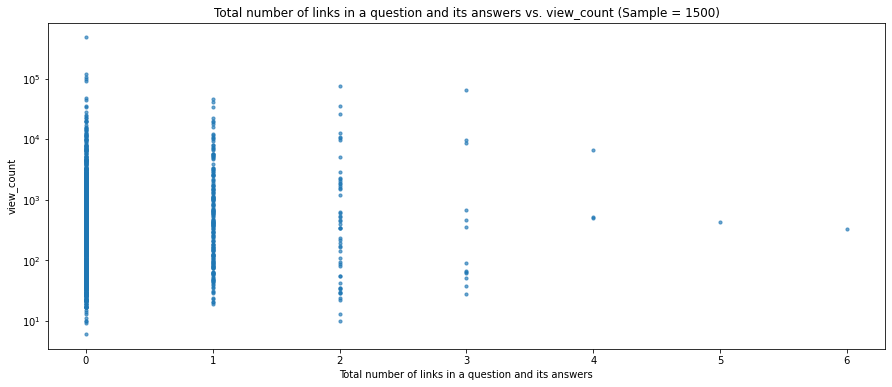

In [ ]:
new = post_links_view.sample(n=1500, random_state=1)
plt.scatter( new.total_num_links,new.view_count,s=10,alpha=0.65)
plt.yscale('symlog')
plt.title("Total number of links in a question  vs. view_count (Sample = 1500)")
plt.xlabel("Total number of links in a question ")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that the view_count is different for different total_num_links, 
so we will include this feature in the model. 

In [ ]:
#view_analysis
#feature 10: the total number of related_post_links for each question and all of its answers 
#(how many times are the post related by other posts)
%%bigquery --project $project_id related_post_links_view
SELECT (q_num_links+ans_num_links) as totalLinks, view_count
FROM(
      SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
             IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
             questions.view_count
      FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions
      LEFT JOIN # get the question with the number of question related_post_links, 
                # and the number of all answer related_post_links 
             (SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                     IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                     q_w_links.id AS q_w_links_id
              FROM # get the question with the number of related_post_links
                   (SELECT count(links.id) AS q_num_links, questions.id as id 
                    FROM `bigquery-public-data.stackoverflow.post_links`links,
                         `bigquery-public-data.stackoverflow.posts_questions`questions
                    WHERE links.related_post_id = questions.id
                    GROUP BY questions.id) as q_w_links
              LEFT JOIN # get the answer with the number of related_post_links
                   (SELECT count(links.id) AS ans_num_links, answers.parent_id
                    FROM `bigquery-public-data.stackoverflow.post_links`links,
                         `bigquery-public-data.stackoverflow.posts_answers`answers
                    WHERE links.related_post_id = answers.id
                    GROUP BY answers.parent_id) as a_w_links
              ON a_w_links.parent_id = q_w_links.id )
      ON  questions.id = q_w_links_id )


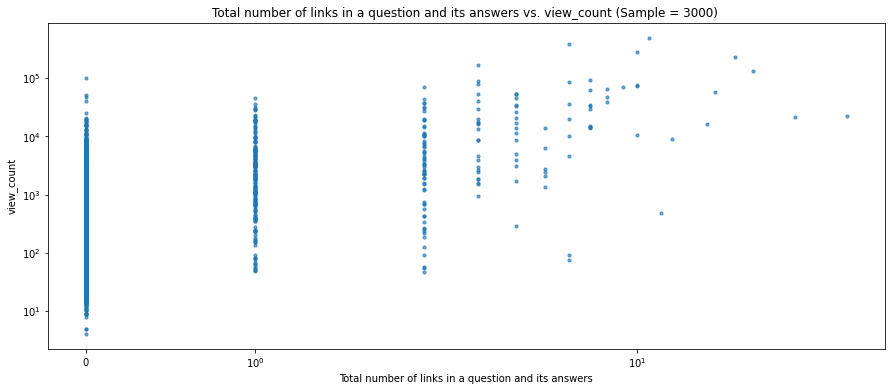

In [ ]:
new = related_post_links_view.sample(n=3000, random_state=1)
plt.scatter( new.totalLinks,new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("Total number of times of a post being related vs. view_count (Sample = 3000) ")
plt.xlabel("Total number of times of a post being related")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there's an increasing trend between total number of related_post_links and view_count, so we will include this feature in the model. 

In [ ]:
# view_analysis
# feature 11: the number of the tags in one question
%%bigquery --project $project_id num_tags
# we calculate the number of tags by calculating the number of delimiters and plus 1
SELECT LENGTH(tags) - LENGTH(REGEXP_REPLACE(tags,r'\|',''))+1 AS tagNum, view_count
FROM `bigquery-public-data.stackoverflow.posts_questions`

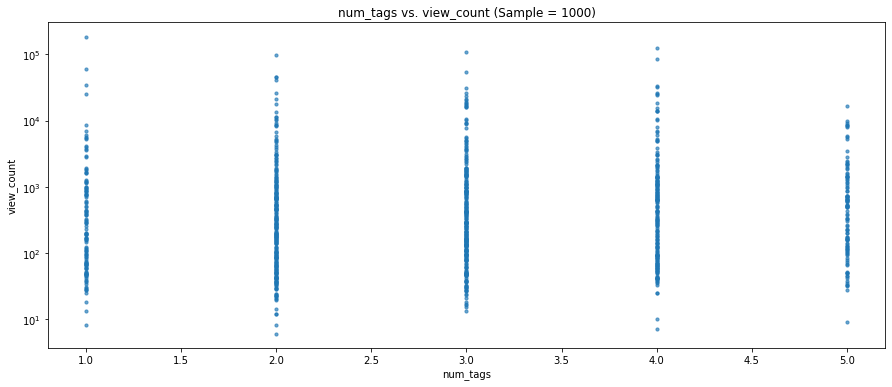

In [ ]:
new = num_tags.sample(n=1000, random_state=1)
plt.scatter(new.tagNum, new.view_count,s=10,alpha=0.65)
plt.yscale('symlog')
plt.title("num_tags vs. view_count (Sample = 1000)")
plt.xlabel("num_tags")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there's a subtle peak when num_tags equals to 3, so we will include this feature in the model. 

In [ ]:
# view_analysis
# feature 11_explore: effect of tagNum on std_view_count and average_view_count for each question 

%%bigquery --project $project_id num_tags_explore 
SELECT tagNum, avg(view_count) AS avg_view, STDDEV_POP(view_count) as std_view
from(
SELECT LENGTH(tags) - LENGTH(REGEXP_REPLACE(tags,r'\|',''))+1 AS tagNum, view_count
FROM `bigquery-public-data.stackoverflow.posts_questions`)
GROUP BY tagNum
ORDER BY tagNum

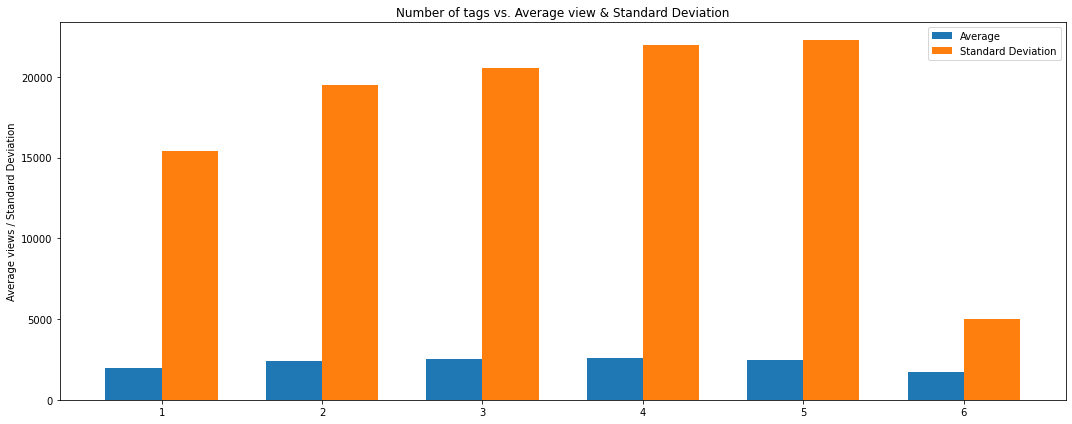

In [ ]:
import numpy as np
x = np.arange(len(num_tags_explore.tagNum))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, num_tags_explore.avg_view, width, label='Average')
rects2 = ax.bar(x + width/2, num_tags_explore.std_view, width, label='Standard Deviation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average views / Standard Deviation')
ax.set_title('Number of tags vs. Average view & Standard Deviation')
ax.set_xticks(x)
ax.set_xticklabels(num_tags_explore.tagNum)
ax.legend()

fig.tight_layout()

plt.show()

The visualization result shows almost no variations on avg_view_count, but flutuations on std_view_count, so the tag number do affect the view_count.

In [ ]:
# view_analysis
# feature 12: average and standard deviation of tag_count for each question
%%bigquery --project $project_id avg_std_tag_count
WITH a AS (
SELECT id,view_count,split(tags,'|') AS tag
FROM `bigquery-public-data.stackoverflow.posts_questions`) 

SELECT IF(avg_tagCount IS NULL,0, avg_tagCount) AS avg_tagCount, IF(std IS NULL,0, std) AS std_tagCount,
       questions.view_count
FROM  `bigquery-public-data.stackoverflow.posts_questions`questions
LEFT JOIN
        (SELECT AVG(tags.count) AS avg_tagCount, STDDEV_POP(tags.count) as std ,id_tag.id
        FROM `bigquery-public-data.stackoverflow.tags`tags,
              (SELECT id, tag, view_count
              FROM a, UNNEST(a.tag) AS tag)id_tag
        WHERE tags.tag_name = id_tag.tag
        GROUP BY id_tag.id)avgTagCount
        ON avgTagCount.id = questions.id

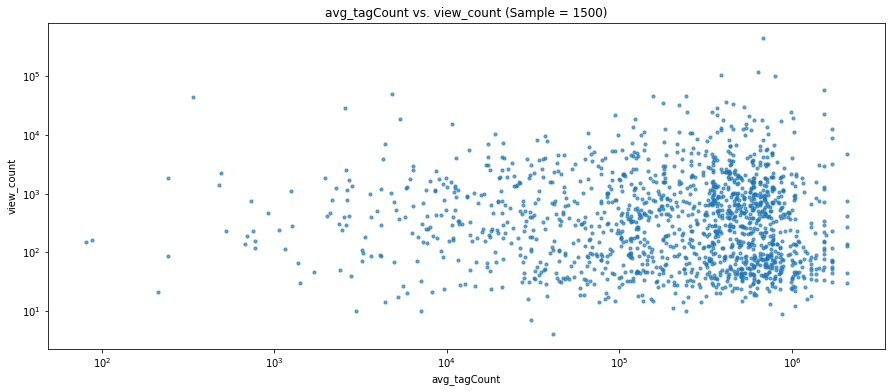

In [ ]:
new = avg_std_tag_count.sample(n=1500, random_state=1)
plt.scatter(new.avg_tagCount, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("avg_tagCount vs. view_count (Sample = 1500)")
plt.xlabel("avg_tagCount")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

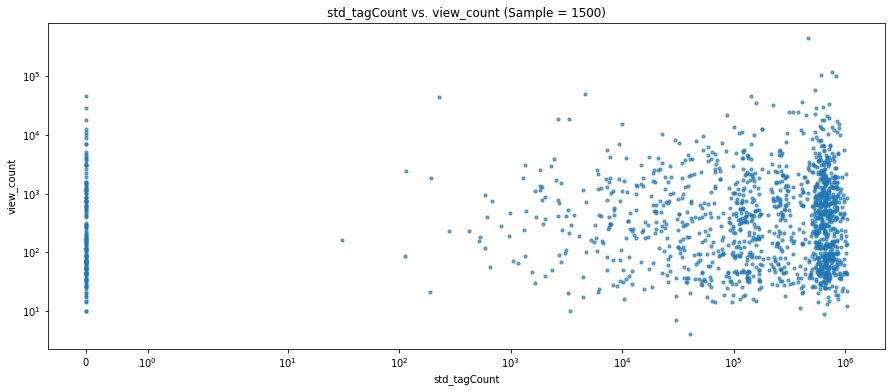

In [ ]:
new = avg_std_tag_count.sample(n=1500, random_state=1)
plt.scatter(new.std_tagCount, new.view_count,s=10,alpha=0.65)
plt.xscale('symlog')
plt.yscale('symlog')
plt.title("std_tagCount vs. view_count (Sample = 1500)")
plt.xlabel("std_tagCount")
plt.ylabel("view_count")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

The visualization result shows that there're some correlations between view_count and avg_tagCount/ std_tagCount, so we will include this feature in the model. 

## Improvement 
## add features (tag_class, tag_num, avg_tagCount, std_tagCount, totalLinks, and totalRelatedLinks)

In [ ]:
%%bigquery --project $project_id

# In the improved version 1, we add tag_class, tag_num, avg_tagCount, std_tagCount, totalLinks, and totalRelatedLinks
CREATE OR REPLACE MODEL `bqml_stackoverflow.stackoverflow_model_improv_v1`
OPTIONS(model_type='BOOSTED_TREE_REGRESSOR', 
        BOOSTER_TYPE = 'GBTREE',
         TREE_METHOD = 'HIST',
         EARLY_STOP = TRUE,
         DATA_SPLIT_METHOD = 'AUTO_SPLIT' 
) AS
SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalLinks.totalLinks,
       totalReputation.totalRepu,
       tagNum.tagNum,
       total_tagCount.avg_tagCount,
       total_tagCount.std,
       tagClass.tag_class,
       totalRelatedLinks.totalRelatedLinks
       

FROM 
    # feature year, answer_count, favorite_count 
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,
    # if the question doesn't have answer, or its answer don't have votes, then the score of answers 
    # are all 0, thus one question might have more then one totalScore. Hence, we choose max(totalScore)
    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
        LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,


    # if the question doesn't have answer, or its answer don't have votes,
    # thus one question might have more then one totalVotes. Hence, we choose max(totalVotes)
     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
          LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,
     # feature totalLinks
     ( SELECT (q_num_links+ans_num_links) as totalLinks, id
      FROM(
            SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                  IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                  questions.id
            FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions
            LEFT JOIN
                  (SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                          IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                          q_w_links.id AS q_w_links_id
                    FROM
                        (SELECT count(links.id) AS q_num_links, questions.id as id 
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_questions`questions
                          WHERE links.related_post_id = questions.id
                          GROUP BY questions.id) as q_w_links
                    LEFT JOIN
                        (SELECT count(links.id) AS ans_num_links, answers.parent_id
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_answers`answers
                          WHERE links.related_post_id = answers.id
                          GROUP BY answers.parent_id) as a_w_links
                    ON a_w_links.parent_id = q_w_links.id )
            ON  questions.id = q_w_links_id )) as totalLinks,
    # feature totalRelatedLinks
    (SELECT IF(q_num_links IS NULL, 0 ,q_num_links) AS totalRelatedLinks, questions.id

    FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions

    LEFT JOIN  (SELECT count(links.id) AS q_num_links, questions.id as id 
              FROM `bigquery-public-data.stackoverflow.post_links`links,
                `bigquery-public-data.stackoverflow.posts_questions`questions
              WHERE links.post_id = questions.id
              GROUP BY questions.id) as q_w_links
        
    ON  questions.id = q_w_links.id) as totalRelatedLinks,
   # feature totalRepu
      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation,
     
     (SELECT LENGTH(tags) - LENGTH(REGEXP_REPLACE(tags,r'\|',''))+1 AS tagNum, id
     FROM `bigquery-public-data.stackoverflow.posts_questions`) as tagNum,
    # feature avg_tagCount & std_tagCount    
     ( WITH a AS (
      SELECT id,view_count,split(tags,'|') AS tag
      FROM `bigquery-public-data.stackoverflow.posts_questions`) 

      SELECT IF(avg_tagCount IS NULL,0, avg_tagCount) AS avg_tagCount, IF(std IS NULL,0, std) AS std, questions.id
      FROM  `bigquery-public-data.stackoverflow.posts_questions`questions
      LEFT JOIN
              (SELECT AVG(tags.count) AS avg_tagCount, STDDEV_POP(tags.count) as std ,id_tag.id
              FROM `bigquery-public-data.stackoverflow.tags`tags,
                    (SELECT id, tag, view_count
                    FROM a, UNNEST(a.tag) AS tag)id_tag
              WHERE tags.tag_name = id_tag.tag
              GROUP BY id_tag.id)sumTagCount
              ON sumTagCount.id = questions.id) as total_tagCount,
    # feature tagClass   
     (SELECT 
       view_count, id,
       CASE 
          WHEN tags like '%pandas%' or tags like '%matplotlib%' or tags like '%regression%' 
          or tags like '%svm%' or tags like '%kaggle%' THEN 'data_science'
          WHEN tags like '%hadoop%' or tags like '%spark%' or tags like '%hive%' 
          or tags like '%hbase%' or tags like '%kafka%' THEN 'big_data'
          WHEN tags like '%mysql%' or tags like '%nosql%' or tags like '%mongodb%' 
          or tags like '%postgresql%' or tags like '%cassandra%' THEN 'database'
          WHEN tags like '%angularjs%' or tags like '%php%' or tags like '%html%' 
          or tags like '%javascript%' or tags like '%css%' THEN 'web'
          WHEN tags like '%c++%' or tags like '%python%' or tags like '%ruby%' 
          or tags like '%c#%' or (tags like '%java%' and tags not like '%javascript%') THEN 'programming_language'
          ELSE 'other'
       END AS tag_class   
      FROM `bigquery-public-data.stackoverflow.posts_questions` as questions) as tagClass


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id and totalVotes.id = totalLinks.id 
      and totalLinks.id = totalReputation.id and   totalReputation.id = tagNum.id and 
      tagNum.id = total_tagCount.id and tagClass.id = total_tagCount.id and total_tagCount.id = totalRelatedLinks.id and multiFeature.year<2019

In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_stackoverflow.stackoverflow_model_improv_v1`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,11,1.75686,1.74219,0.3,13087
1,0,10,1.76814,1.75358,0.3,50
2,0,9,1.78981,1.77527,0.3,45
3,0,8,1.82690,1.81268,0.3,51
4,0,7,1.89759,1.88371,0.3,50
5,0,6,2.03000,2.01722,0.3,54
6,0,5,2.26706,2.25597,0.3,54
7,0,4,2.68293,2.67447,0.3,13470
8,0,3,3.37218,3.36604,0.3,48
9,0,2,4.45612,4.45211,0.3,50


In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_stackoverflow.stackoverflow_model_improv_v1`, (

SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalLinks.totalLinks,
       totalReputation.totalRepu,
       tagNum.tagNum,
       total_tagCount.avg_tagCount,
       total_tagCount.std,
       tagClass.tag_class,
       totalRelatedLinks.totalRelatedLinks
       

FROM 
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,

    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
        LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,


     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
          LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,

     ( SELECT (q_num_links+ans_num_links) as totalLinks, id
      FROM(
            SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                  IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                  questions.id
            FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions
            LEFT JOIN
                  (SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                          IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                          q_w_links.id AS q_w_links_id
                    FROM
                        (SELECT count(links.id) AS q_num_links, questions.id as id 
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_questions`questions
                          WHERE links.related_post_id = questions.id
                          GROUP BY questions.id) as q_w_links
                    LEFT JOIN
                        (SELECT count(links.id) AS ans_num_links, answers.parent_id
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_answers`answers
                          WHERE links.related_post_id = answers.id
                          GROUP BY answers.parent_id) as a_w_links
                    ON a_w_links.parent_id = q_w_links.id )
            ON  questions.id = q_w_links_id )) as totalLinks,

                (SELECT IF(q_num_links IS NULL, 0 ,q_num_links) AS totalRelatedLinks, questions.id

    FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions

    LEFT JOIN  (SELECT count(links.id) AS q_num_links, questions.id as id 
              FROM `bigquery-public-data.stackoverflow.post_links`links,
                `bigquery-public-data.stackoverflow.posts_questions`questions
              WHERE links.post_id = questions.id
              GROUP BY questions.id) as q_w_links
        
    ON  questions.id = q_w_links.id) as totalRelatedLinks,

      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation,
     
     (SELECT LENGTH(tags) - LENGTH(REGEXP_REPLACE(tags,r'\|',''))+1 AS tagNum, id
     FROM `bigquery-public-data.stackoverflow.posts_questions`) as tagNum,
     
     ( WITH a AS (
      SELECT id,view_count,split(tags,'|') AS tag
      FROM `bigquery-public-data.stackoverflow.posts_questions`) 

      SELECT IF(avg_tagCount IS NULL,0, avg_tagCount) AS avg_tagCount, IF(std IS NULL,0, std) AS std, questions.id
      FROM  `bigquery-public-data.stackoverflow.posts_questions`questions
      LEFT JOIN
              (SELECT AVG(tags.count) AS avg_tagCount, STDDEV_POP(tags.count) as std ,id_tag.id
              FROM `bigquery-public-data.stackoverflow.tags`tags,
                    (SELECT id, tag, view_count
                    FROM a, UNNEST(a.tag) AS tag)id_tag
              WHERE tags.tag_name = id_tag.tag
              GROUP BY id_tag.id)sumTagCount
              ON sumTagCount.id = questions.id) as total_tagCount,
    
     (SELECT 
       view_count, id,
       CASE 
          WHEN tags like '%pandas%' or tags like '%matplotlib%' or tags like '%regression%' 
          or tags like '%svm%' or tags like '%kaggle%' THEN 'data_science'
          WHEN tags like '%hadoop%' or tags like '%spark%' or tags like '%hive%' 
          or tags like '%hbase%' or tags like '%kafka%' THEN 'big_data'
          WHEN tags like '%mysql%' or tags like '%nosql%' or tags like '%mongodb%' 
          or tags like '%postgresql%' or tags like '%cassandra%' THEN 'database'
          WHEN tags like '%angularjs%' or tags like '%php%' or tags like '%html%' 
          or tags like '%javascript%' or tags like '%css%' THEN 'web'
          WHEN tags like '%c++%' or tags like '%python%' or tags like '%ruby%' 
          or tags like '%c#%' or (tags like '%java%' and tags not like '%javascript%') THEN 'programming_language'
          ELSE 'other'
       END AS tag_class   
      FROM `bigquery-public-data.stackoverflow.posts_questions` as questions) as tagClass


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id and totalVotes.id = totalLinks.id 
      and totalLinks.id = totalReputation.id and   totalReputation.id = tagNum.id and 
      tagNum.id = total_tagCount.id and tagClass.id = total_tagCount.id and total_tagCount.id = totalRelatedLinks.id and multiFeature.year=2019
      ))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,1.520507,3.262916,0.049546,1.428857,0.55719,0.60899


## Improvement 
## add features (tag_class, tag_num, avg_tagCount, std_tagCount, totalLinks, totalRelatedLinks, and best_answer_length)

In [ ]:
%%bigquery --project $project_id
# in improved version 2, we add one more feature - best_answer_length

CREATE OR REPLACE MODEL `bqml_stackoverflow.stackoverflow_model_improv_v2`
OPTIONS(model_type='BOOSTED_TREE_REGRESSOR', 
        BOOSTER_TYPE = 'GBTREE',
         TREE_METHOD = 'HIST',
         EARLY_STOP = TRUE,
         DATA_SPLIT_METHOD = 'AUTO_SPLIT' 
) AS
SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalLinks.totalLinks,
       totalReputation.totalRepu,
       tagNum.tagNum,
       total_tagCount.avg_tagCount,
       total_tagCount.std,
       tagClass.tag_class,
       totalRelatedLinks.totalRelatedLinks,
       best_answer_length.best_answer_length
       

FROM 
    # feature year, answer_count, favorite_count 
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,
    # if the question doesn't have answer, or its answer don't have votes, then the score of answers 
    # are all 0, thus one question might have more then one totalScore. Hence, we choose max(totalScore)
    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
        LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,


    # if the question doesn't have answer, or its answer don't have votes,
    # thus one question might have more then one totalVotes. Hence, we choose max(totalVotes)
     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
          LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,
     # feature totalLinks
     ( SELECT (q_num_links+ans_num_links) as totalLinks, id
      FROM(
            SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                  IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                  questions.id
            FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions
            LEFT JOIN
                  (SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                          IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                          q_w_links.id AS q_w_links_id
                    FROM
                        (SELECT count(links.id) AS q_num_links, questions.id as id 
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_questions`questions
                          WHERE links.related_post_id = questions.id
                          GROUP BY questions.id) as q_w_links
                    LEFT JOIN
                        (SELECT count(links.id) AS ans_num_links, answers.parent_id
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_answers`answers
                          WHERE links.related_post_id = answers.id
                          GROUP BY answers.parent_id) as a_w_links
                    ON a_w_links.parent_id = q_w_links.id )
            ON  questions.id = q_w_links_id )) as totalLinks,
    # feature totalRelatedLinks
    (SELECT IF(q_num_links IS NULL, 0 ,q_num_links) AS totalRelatedLinks, questions.id

    FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions

    LEFT JOIN  (SELECT count(links.id) AS q_num_links, questions.id as id 
              FROM `bigquery-public-data.stackoverflow.post_links`links,
                `bigquery-public-data.stackoverflow.posts_questions`questions
              WHERE links.post_id = questions.id
              GROUP BY questions.id) as q_w_links
        
    ON  questions.id = q_w_links.id) as totalRelatedLinks,
    # feature totalRepu
      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation,
      
     # feature tagNum
     (SELECT LENGTH(tags) - LENGTH(REGEXP_REPLACE(tags,r'\|',''))+1 AS tagNum, id
     FROM `bigquery-public-data.stackoverflow.posts_questions`) as tagNum,
     # feature avg_tagCount & std_tagCount
     ( WITH a AS (
      SELECT id,view_count,split(tags,'|') AS tag
      FROM `bigquery-public-data.stackoverflow.posts_questions`) 

      SELECT IF(avg_tagCount IS NULL,0, avg_tagCount) AS avg_tagCount, IF(std IS NULL,0, std) AS std, questions.id
      FROM  `bigquery-public-data.stackoverflow.posts_questions`questions
      LEFT JOIN
              (SELECT AVG(tags.count) AS avg_tagCount, STDDEV_POP(tags.count) as std ,id_tag.id
              FROM `bigquery-public-data.stackoverflow.tags`tags,
                    (SELECT id, tag, view_count
                    FROM a, UNNEST(a.tag) AS tag)id_tag
              WHERE tags.tag_name = id_tag.tag
              GROUP BY id_tag.id)sumTagCount
              ON sumTagCount.id = questions.id) as total_tagCount,
  # feature tagClass  
     (SELECT 
       view_count, id,
       CASE 
          WHEN tags like '%pandas%' or tags like '%matplotlib%' or tags like '%regression%' 
          or tags like '%svm%' or tags like '%kaggle%' THEN 'data_science'
          WHEN tags like '%hadoop%' or tags like '%spark%' or tags like '%hive%' 
          or tags like '%hbase%' or tags like '%kafka%' THEN 'big_data'
          WHEN tags like '%mysql%' or tags like '%nosql%' or tags like '%mongodb%' 
          or tags like '%postgresql%' or tags like '%cassandra%' THEN 'database'
          WHEN tags like '%angularjs%' or tags like '%php%' or tags like '%html%' 
          or tags like '%javascript%' or tags like '%css%' THEN 'web'
          WHEN tags like '%c++%' or tags like '%python%' or tags like '%ruby%' 
          or tags like '%c#%' or (tags like '%java%' and tags not like '%javascript%') THEN 'programming_language'
          ELSE 'other'
       END AS tag_class   
      FROM `bigquery-public-data.stackoverflow.posts_questions` as questions) as tagClass,
  # feature best_answer_length 
       (SELECT  IF(MAX(answer_length) IS NULL,0,MAX(answer_length)) AS  best_answer_length,  id
        FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes
                FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                LEFT JOIN
                        (SELECT parent_id , max(numVotes) as maxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                  (SELECT  count(vote_type_id) as numVotes, post_id
                                    FROM `bigquery-public-data.stackoverflow.votes` as vote
                                    WHERE vote_type_id=2
                                    GROUP BY post_id) AS Votes
                            WHERE answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
                    ON answerMaxVote.parent_id = questions.id
                    Order by maxVotes) as questions
              
      LEFT JOIN     
              (SELECT LENGTH(answers.body) as answer_length,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes
              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
              LEFT JOIN
                    (SELECT  count(vote_type_id) as numVotes, post_id
                    FROM `bigquery-public-data.stackoverflow.votes` as vote
                    WHERE vote_type_id=2
                    GROUP BY post_id) AS Votes
              ON Votes.post_id = answers.id) as answers  
     ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes
     GROUP BY id) as best_answer_length


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id and totalVotes.id = totalLinks.id 
      and totalLinks.id = totalReputation.id and   totalReputation.id = best_answer_length.id and best_answer_length.id = tagNum.id and 
      tagNum.id = total_tagCount.id and tagClass.id = total_tagCount.id and total_tagCount.id = totalRelatedLinks.id and multiFeature.year<2019

In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_stackoverflow.stackoverflow_model_improv_v2`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,11,1.72688,1.73785,0.3,92
1,0,10,1.73845,1.74948,0.3,13307
2,0,9,1.75880,1.77054,0.3,53
3,0,8,1.79591,1.80906,0.3,47
4,0,7,1.86385,1.87838,0.3,57
5,0,6,1.99012,2.00643,0.3,52
6,0,5,2.22003,2.23765,0.3,43
7,0,4,2.62155,2.64055,0.3,13175
8,0,3,3.28557,3.30442,0.3,47
9,0,2,4.33266,4.34966,0.3,59


In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_stackoverflow.stackoverflow_model_improv_v2`, (

SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalLinks.totalLinks,
       totalReputation.totalRepu,
       tagNum.tagNum,
       total_tagCount.avg_tagCount,
       total_tagCount.std,
       tagClass.tag_class,
       totalRelatedLinks.totalRelatedLinks,
       best_answer_length.best_answer_length
       

FROM 
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,

    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
        LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,


     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
          LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,

     ( SELECT (q_num_links+ans_num_links) as totalLinks, id
      FROM(
            SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                  IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                  questions.id
            FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions
            LEFT JOIN
                  (SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                          IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                          q_w_links.id AS q_w_links_id
                    FROM
                        (SELECT count(links.id) AS q_num_links, questions.id as id 
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_questions`questions
                          WHERE links.related_post_id = questions.id
                          GROUP BY questions.id) as q_w_links
                    LEFT JOIN
                        (SELECT count(links.id) AS ans_num_links, answers.parent_id
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_answers`answers
                          WHERE links.related_post_id = answers.id
                          GROUP BY answers.parent_id) as a_w_links
                    ON a_w_links.parent_id = q_w_links.id )
            ON  questions.id = q_w_links_id )) as totalLinks,

                (SELECT IF(q_num_links IS NULL, 0 ,q_num_links) AS totalRelatedLinks, questions.id

    FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions

    LEFT JOIN  (SELECT count(links.id) AS q_num_links, questions.id as id 
              FROM `bigquery-public-data.stackoverflow.post_links`links,
                `bigquery-public-data.stackoverflow.posts_questions`questions
              WHERE links.post_id = questions.id
              GROUP BY questions.id) as q_w_links
        
    ON  questions.id = q_w_links.id) as totalRelatedLinks,

      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation,
      
     
     (SELECT LENGTH(tags) - LENGTH(REGEXP_REPLACE(tags,r'\|',''))+1 AS tagNum, id
     FROM `bigquery-public-data.stackoverflow.posts_questions`) as tagNum,
     
     ( WITH a AS (
      SELECT id,view_count,split(tags,'|') AS tag
      FROM `bigquery-public-data.stackoverflow.posts_questions`) 

      SELECT IF(avg_tagCount IS NULL,0, avg_tagCount) AS avg_tagCount, IF(std IS NULL,0, std) AS std, questions.id
      FROM  `bigquery-public-data.stackoverflow.posts_questions`questions
      LEFT JOIN
              (SELECT AVG(tags.count) AS avg_tagCount, STDDEV_POP(tags.count) as std ,id_tag.id
              FROM `bigquery-public-data.stackoverflow.tags`tags,
                    (SELECT id, tag, view_count
                    FROM a, UNNEST(a.tag) AS tag)id_tag
              WHERE tags.tag_name = id_tag.tag
              GROUP BY id_tag.id)sumTagCount
              ON sumTagCount.id = questions.id) as total_tagCount,
    
     (SELECT 
       view_count, id,
       CASE 
          WHEN tags like '%pandas%' or tags like '%matplotlib%' or tags like '%regression%' 
          or tags like '%svm%' or tags like '%kaggle%' THEN 'data_science'
          WHEN tags like '%hadoop%' or tags like '%spark%' or tags like '%hive%' 
          or tags like '%hbase%' or tags like '%kafka%' THEN 'big_data'
          WHEN tags like '%mysql%' or tags like '%nosql%' or tags like '%mongodb%' 
          or tags like '%postgresql%' or tags like '%cassandra%' THEN 'database'
          WHEN tags like '%angularjs%' or tags like '%php%' or tags like '%html%' 
          or tags like '%javascript%' or tags like '%css%' THEN 'web'
          WHEN tags like '%c++%' or tags like '%python%' or tags like '%ruby%' 
          or tags like '%c#%' or (tags like '%java%' and tags not like '%javascript%') THEN 'programming_language'
          ELSE 'other'
       END AS tag_class   
      FROM `bigquery-public-data.stackoverflow.posts_questions` as questions) as tagClass,

       (SELECT  IF(MAX(answer_length) IS NULL,0,MAX(answer_length)) AS  best_answer_length,  id
        FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes
                FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                LEFT JOIN
                        (SELECT parent_id , max(numVotes) as maxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                  (SELECT  count(vote_type_id) as numVotes, post_id
                                    FROM `bigquery-public-data.stackoverflow.votes` as vote
                                    WHERE vote_type_id=2
                                    GROUP BY post_id) AS Votes
                            WHERE answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
                    ON answerMaxVote.parent_id = questions.id
                    Order by maxVotes) as questions
              
      LEFT JOIN     
              (SELECT LENGTH(answers.body) as answer_length,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes
              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
              LEFT JOIN
                    (SELECT  count(vote_type_id) as numVotes, post_id
                    FROM `bigquery-public-data.stackoverflow.votes` as vote
                    WHERE vote_type_id=2
                    GROUP BY post_id) AS Votes
              ON Votes.post_id = answers.id) as answers  
     ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes
     GROUP BY id) as best_answer_length


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id and totalVotes.id = totalLinks.id 
      and totalLinks.id = totalReputation.id and   totalReputation.id = best_answer_length.id and best_answer_length.id = tagNum.id and 
      tagNum.id = total_tagCount.id and tagClass.id = total_tagCount.id and total_tagCount.id = totalRelatedLinks.id and multiFeature.year=2019
      ))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,1.363759,2.812486,0.03982,1.203933,0.618318,0.619826


Though from the data visualization, the answer length didn't show a cleaer relationship with the view count, compared with the model without adding answer length feature, the XGB Tree model with the answer length feature has a significant decrease in MSE. That means answer length might influence or is related to other features which could also influence the label prediction a lot.

After adding the best_answer_length, the mse and r2 change from 3.26 to 2.81, 0.5 57 to 0.618, respectively.  

# Data prediction


In [ ]:
%%bigquery --project $project_id prediction

# YOUR QUERY HERE

SELECT
       answer_count,  year,  favorite_count, totalScore,  totalVotes, totalLinks, totalRepu,
       tagNum, avg_tagCount, std as tag_count_std, tag_class, totalRelatedLinks, best_answer_length,
       predicted_label, label as ground_truth
FROM
  ML.PREDICT(MODEL `bqml_stackoverflow.stackoverflow_model_improv_v2`, (

SELECT LOG(multiFeature.view_count,2) AS label,
       multiFeature.answer_count, 
       multiFeature.year, 
       multiFeature.favorite_count,
       totalScore.totalScore, 
       totalVotes.totalVotes,
       totalLinks.totalLinks,
       totalReputation.totalRepu,
       tagNum.tagNum,
       total_tagCount.avg_tagCount,
       total_tagCount.std,
       tagClass.tag_class,
       totalRelatedLinks.totalRelatedLinks,
       best_answer_length.best_answer_length
       

FROM 
    (SELECT EXTRACT (YEAR FROM last_activity_date) AS year,answer_count,favorite_count, view_count, id
    FROM `bigquery-public-data.stackoverflow.posts_questions` questions) AS multiFeature,

    (SELECT Max(totalScore) AS totalScore, id
    FROM(
          SELECT (Qscore + Ascore) as totalScore, id
          FROM (
                SELECT questions.score AS Qscore, IF(answers.score is null,0,answers.score) as Ascore, questions.id
                FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes, score, questions.view_count
                        FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                        LEFT JOIN
                              (SELECT parent_id , max(numVotes) as maxVotes
                              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                      (SELECT  count(vote_type_id) as numVotes, post_id
                                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                                        WHERE vote_type_id=2
                                        GROUP BY post_id) AS Votes
                                WHERE answers.id = Votes.post_id
                                GROUP BY parent_id) AS answerMaxVote
                        ON answerMaxVote.parent_id = questions.id
                        Order by maxVotes) as questions
                  
        LEFT JOIN     
                  (SELECT answers.id,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes, answers.score
                  FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                  LEFT JOIN
                        (SELECT  count(vote_type_id) as numVotes, post_id
                        FROM `bigquery-public-data.stackoverflow.votes` as vote
                        WHERE vote_type_id=2
                        GROUP BY post_id) AS Votes
                  ON Votes.post_id = answers.id) as answers               
          ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes))
    GROUP BY id) as totalScore,


     (SELECT MAX(totalVotes) as totalVotes, id
      FROM(
            SELECT QuesVotes+ ansMaxVotes as  totalVotes, questions.id
            FROM   (SELECT questions.id, questions.view_count,IF(numVotes IS NULL,0, numVotes) as QuesVotes
                    FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                    LEFT JOIN 
                        ( SELECT post_id,   count(vote_type_id) AS numVotes
                          FROM `bigquery-public-data.stackoverflow.votes` as vot
                          WHERE vote_type_id=2
                          GROUP BY post_id) AS Votes
                    ON questions.ID = Votes.post_id) as questions
          LEFT JOIN 
                        ( SELECT parent_id , IF(max(numVotes) IS NULL,0,max(numVotes))  as ansMaxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
                          LEFT JOIN
                                (SELECT  count(vote_type_id) as numVotes, post_id
                                  FROM `bigquery-public-data.stackoverflow.votes` as vote
                                  WHERE vote_type_id=2
                                  GROUP BY post_id) AS Votes
                            ON answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
           ON answerMaxVote.parent_id = questions.id)
     GROUP BY id)  as totalVotes,

     ( SELECT (q_num_links+ans_num_links) as totalLinks, id
      FROM(
            SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                  IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                  questions.id
            FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions
            LEFT JOIN
                  (SELECT IF(q_num_links IS NULL,0, q_num_links) AS q_num_links,
                          IF(ans_num_links IS NULL,0,ans_num_links) AS ans_num_links,
                          q_w_links.id AS q_w_links_id
                    FROM
                        (SELECT count(links.id) AS q_num_links, questions.id as id 
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_questions`questions
                          WHERE links.related_post_id = questions.id
                          GROUP BY questions.id) as q_w_links
                    LEFT JOIN
                        (SELECT count(links.id) AS ans_num_links, answers.parent_id
                          FROM `bigquery-public-data.stackoverflow.post_links`links,
                              `bigquery-public-data.stackoverflow.posts_answers`answers
                          WHERE links.related_post_id = answers.id
                          GROUP BY answers.parent_id) as a_w_links
                    ON a_w_links.parent_id = q_w_links.id )
            ON  questions.id = q_w_links_id )) as totalLinks,

                (SELECT IF(q_num_links IS NULL, 0 ,q_num_links) AS totalRelatedLinks, questions.id

    FROM  `bigquery-public-data.stackoverflow.posts_questions` as questions

    LEFT JOIN  (SELECT count(links.id) AS q_num_links, questions.id as id 
              FROM `bigquery-public-data.stackoverflow.post_links`links,
                `bigquery-public-data.stackoverflow.posts_questions`questions
              WHERE links.post_id = questions.id
              GROUP BY questions.id) as q_w_links
        
    ON  questions.id = q_w_links.id) as totalRelatedLinks,

      (SELECT ans_repu + ques_repu as totalRepu, id
      FROM(
            SELECT IF(maxReputation IS NULL,0,maxReputation) as ans_repu ,questions_users_reputation.reputation AS ques_repu, id
            FROM    
                  ( SELECT questions.id as question_id, users.reputation, questions.id
                  FROM `bigquery-public-data.stackoverflow.posts_questions` as questions,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE questions.owner_user_id = users.id) AS questions_users_reputation
            LEFT JOIN      
                  ( SELECT  answers.parent_id, Max(users.reputation) as maxReputation
                  FROM `bigquery-public-data.stackoverflow.posts_answers` as answers,
                        `bigquery-public-data.stackoverflow.users` as users
                  WHERE answers.owner_user_id = users.id
                  GROUP BY parent_id) AS answers_users_maxReputation
            ON answers_users_maxReputation.parent_id = questions_users_reputation.question_id
      )) as totalReputation,
      
     
     (SELECT LENGTH(tags) - LENGTH(REGEXP_REPLACE(tags,r'\|',''))+1 AS tagNum, id
     FROM `bigquery-public-data.stackoverflow.posts_questions`) as tagNum,
     
     ( WITH a AS (
      SELECT id,view_count,split(tags,'|') AS tag
      FROM `bigquery-public-data.stackoverflow.posts_questions`) 

      SELECT IF(avg_tagCount IS NULL,0, avg_tagCount) AS avg_tagCount, IF(std IS NULL,0, std) AS std, questions.id
      FROM  `bigquery-public-data.stackoverflow.posts_questions`questions
      LEFT JOIN
              (SELECT AVG(tags.count) AS avg_tagCount, STDDEV_POP(tags.count) as std ,id_tag.id
              FROM `bigquery-public-data.stackoverflow.tags`tags,
                    (SELECT id, tag, view_count
                    FROM a, UNNEST(a.tag) AS tag)id_tag
              WHERE tags.tag_name = id_tag.tag
              GROUP BY id_tag.id)sumTagCount
              ON sumTagCount.id = questions.id) as total_tagCount,
    
     (SELECT 
       view_count, id,
       CASE 
          WHEN tags like '%pandas%' or tags like '%matplotlib%' or tags like '%regression%' 
          or tags like '%svm%' or tags like '%kaggle%' THEN 'data_science'
          WHEN tags like '%hadoop%' or tags like '%spark%' or tags like '%hive%' 
          or tags like '%hbase%' or tags like '%kafka%' THEN 'big_data'
          WHEN tags like '%mysql%' or tags like '%nosql%' or tags like '%mongodb%' 
          or tags like '%postgresql%' or tags like '%cassandra%' THEN 'database'
          WHEN tags like '%angularjs%' or tags like '%php%' or tags like '%html%' 
          or tags like '%javascript%' or tags like '%css%' THEN 'web'
          WHEN tags like '%c++%' or tags like '%python%' or tags like '%ruby%' 
          or tags like '%c#%' or (tags like '%java%' and tags not like '%javascript%') THEN 'programming_language'
          ELSE 'other'
       END AS tag_class   
      FROM `bigquery-public-data.stackoverflow.posts_questions` as questions) as tagClass,

       (SELECT  IF(MAX(answer_length) IS NULL,0,MAX(answer_length)) AS  best_answer_length,  id
        FROM   (SELECT questions.id, IF(maxVotes IS NULL, 0, maxVotes) as maxVotes
                FROM   `bigquery-public-data.stackoverflow.posts_questions` questions
                LEFT JOIN
                        (SELECT parent_id , max(numVotes) as maxVotes
                          FROM  `bigquery-public-data.stackoverflow.posts_answers` answers,
                                  (SELECT  count(vote_type_id) as numVotes, post_id
                                    FROM `bigquery-public-data.stackoverflow.votes` as vote
                                    WHERE vote_type_id=2
                                    GROUP BY post_id) AS Votes
                            WHERE answers.id = Votes.post_id
                            GROUP BY parent_id) AS answerMaxVote
                    ON answerMaxVote.parent_id = questions.id
                    Order by maxVotes) as questions
              
      LEFT JOIN     
              (SELECT LENGTH(answers.body) as answer_length,answers.parent_id, IF(numVotes IS NULL,0,numVotes) as numVotes
              FROM  `bigquery-public-data.stackoverflow.posts_answers` answers
              LEFT JOIN
                    (SELECT  count(vote_type_id) as numVotes, post_id
                    FROM `bigquery-public-data.stackoverflow.votes` as vote
                    WHERE vote_type_id=2
                    GROUP BY post_id) AS Votes
              ON Votes.post_id = answers.id) as answers  
     ON questions.id = answers.parent_id and questions.maxVotes = answers.numVotes
     GROUP BY id) as best_answer_length


WHERE multiFeature.id = totalScore.id and totalScore.id = totalVotes.id and totalVotes.id = totalLinks.id 
      and totalLinks.id = totalReputation.id and   totalReputation.id = best_answer_length.id and best_answer_length.id = tagNum.id and 
      tagNum.id = total_tagCount.id and tagClass.id = total_tagCount.id and total_tagCount.id = totalRelatedLinks.id and multiFeature.year=2020))

In [ ]:
prediction[0:20]

,answer_count,year,favorite_count,totalScore,totalVotes,totalLinks,totalRepu,tagNum,avg_tagCount,tag_count_std,tag_class,totalRelatedLinks,best_answer_length,predicted_label,ground_truth
0,5,2020,NaN,29,29,1,68833,3,261825.333333,273401.698415,other,1,726,12.788785,12.645884
1,3,2020,1.0,26,26,1,256456,2,848494.000000,680155.000000,data_science,0,867,12.628924,12.065753
2,2,2020,14.0,236,236,5,26534,3,42690.000000,58615.606750,other,1,827,15.221150,15.186965
3,6,2020,2.0,151,151,2,69399,4,416896.000000,591199.147360,programming_language,1,95,15.193257,16.081483
4,5,2020,3.0,15,16,1,25652,1,66775.000000,0.000000,other,1,1363,12.715098,12.786270
5,13,2020,153.0,642,643,68,320898,2,660679.500000,636185.500000,other,3,7910,16.649408,18.824881
6,4,2020,3.0,29,30,2,34492,2,781711.500000,746937.500000,programming_language,1,694,13.685539,13.655419
7,7,2020,4.0,31,31,7,8265,4,460723.000000,722833.633807,programming_language,0,260,14.157101,14.608486
8,1,2020,3.0,17,18,0,42284,2,761684.000000,671802.000000,programming_language,0,1133,11.293005,11.958190
9,2,2020,7.0,65,65,8,3536,2,137735.000000,106268.000000,other,0,160,14.285584,15.626935


# Conclusion

In this project, we have explored 13 features that might determine the popularity of a post question. Based on the visualization results, we validated most of our predictions and eliminated only 1 unrelated features. The effective features are the number of answers, the totalScore, the totalVotes, and favorite_count of the question and its best answer, the total reputation of the questioner and the answerer who asks the best answer, the total number of postLinks and relatedPostLinks, the total number of tags per question, the avg_tagCount and std_tagCount, and the tag_class. At first, we created a linear regression model and XGB model based on the first 5 features before 2019. Since we got a better evaluation result for the year 2019 on XGB model, we decided to use XGB model for further improvement. In the improvement process, we added the last seven features and got a pretty good evaluation result for the view_count in 2020 (mse ~ 2.8, r2 ~ 0.62). 

However, we noticed the limitations of our analysis. Firstly, there might be other correlated features in tables that we didn't included, like posts_tags_wiki, posts_tags_excerpt, posts_wiki_placeholder, etc. Also, the user analysis is not thorough since we only considered the user reputation. However, other features related to the user might have positive or negative correlations with the view_count, like user's badges (gold/silver/bronze), user's upvotes(downvotes), and user's score. Here, we used the log scale (base = 2) of the view_count as the label, while the view_count is not strictly updated as the multiples of 2. We need further analysis on the scale of label for more accurate results. Lastly, we only chose XGB and linear regression as our models, there might be better models for our analysis.

In conclusion, our final prediction is very close to the ground truth but further improvement is needed.





